In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

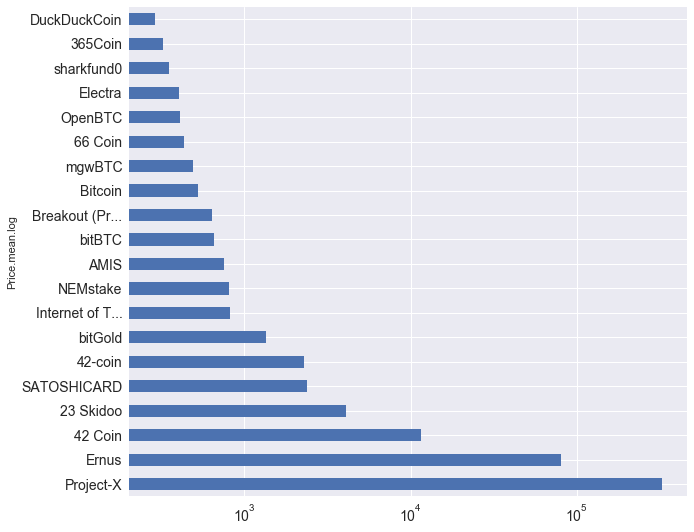

In [33]:
df = pd.read_csv('output.csv',
                 index_col='Day',
                 parse_dates=True,
                 na_values='?',
                 dtype={'Price': 'float', 'Market Cap': 'float', 'Circulating Supply': 'float'})
df.groupby('Name')['Price'].mean().sort_values(ascending=False).head(20).plot.barh(logx=True, figsize=(10,9), fontsize=14)
plt.ylabel('Price.mean.log')

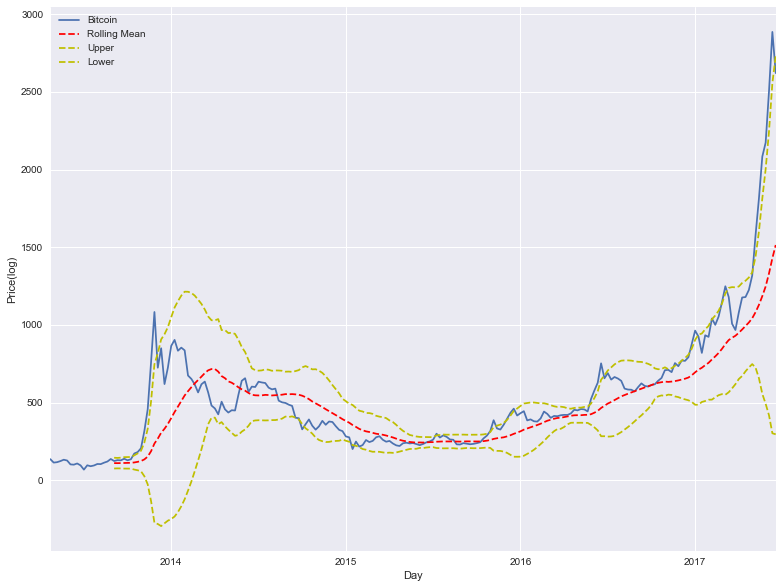

In [95]:
bitcoin = df[df['Name'] == 'Bitcoin']
bitcoin['Price'].plot(figsize=(13,10), label='Bitcoin')
rm = bitcoin['Price'].rolling(20)
std = rm.std()
rm.mean().plot(style="r--", label='Rolling Mean')
(rm.mean() + std * 2).plot(style="y--", label='Upper')
(rm.mean() - std * 2).plot(style="y--", label='Lower')
plt.legend()
plt.ylabel('Price(log)')

In [73]:
pivoted_df = pd.pivot_table(df, index='Day', columns='Name', values='Price')
av = pivoted_df.rolling(window=3).mean().stack()
av

Day         Name       
2013-05-12  Bitcoin         121.703333
            Devcoin           0.000277
            Litecoin          3.740000
            Namecoin          1.027762
            Novacoin          3.760000
            Peercoin          0.312290
            Terracoin         0.540555
2013-05-19  Bitcoin         117.543333
            Devcoin           0.000230
            Feathercoin       0.217779
            Freicoin          0.060466
            Litecoin          3.410000
            Mincoin           0.196604
            Namecoin          0.910448
            Novacoin          3.576667
            Peercoin          0.246063
            Terracoin         0.446349
2013-05-26  BBQCoin           0.007773
            BitBar           30.063333
            Bitcoin         123.710000
            CHNCoin           0.089281
            Devcoin           0.000204
            Feathercoin       0.117400
            Freicoin          0.035371
            Ixcoin            0.011699
 